## train.csv

In [1182]:
# Survived sutunu, baz alacağımız ana sutundur. hayatta mı değil mi

In [1183]:
# İlgili kütüphaneler import edilir
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
from collections import Counter

In [1184]:
# Veri setini okumak
df_train = pd.read_csv("Train.csv",delimiter=",")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1185]:
df_train = df_train.drop(columns="PassengerId")

In [1186]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_train,5)

          Eksik Değerler  Eksik Değerler Yüzdesi
Cabin                687               77.104377
Age                  177               19.865320
Embarked               2                0.224467
Survived               0                0.000000
Pclass                 0                0.000000


In [1187]:
df_train = df_train.drop(columns="Cabin")

<Axes: >

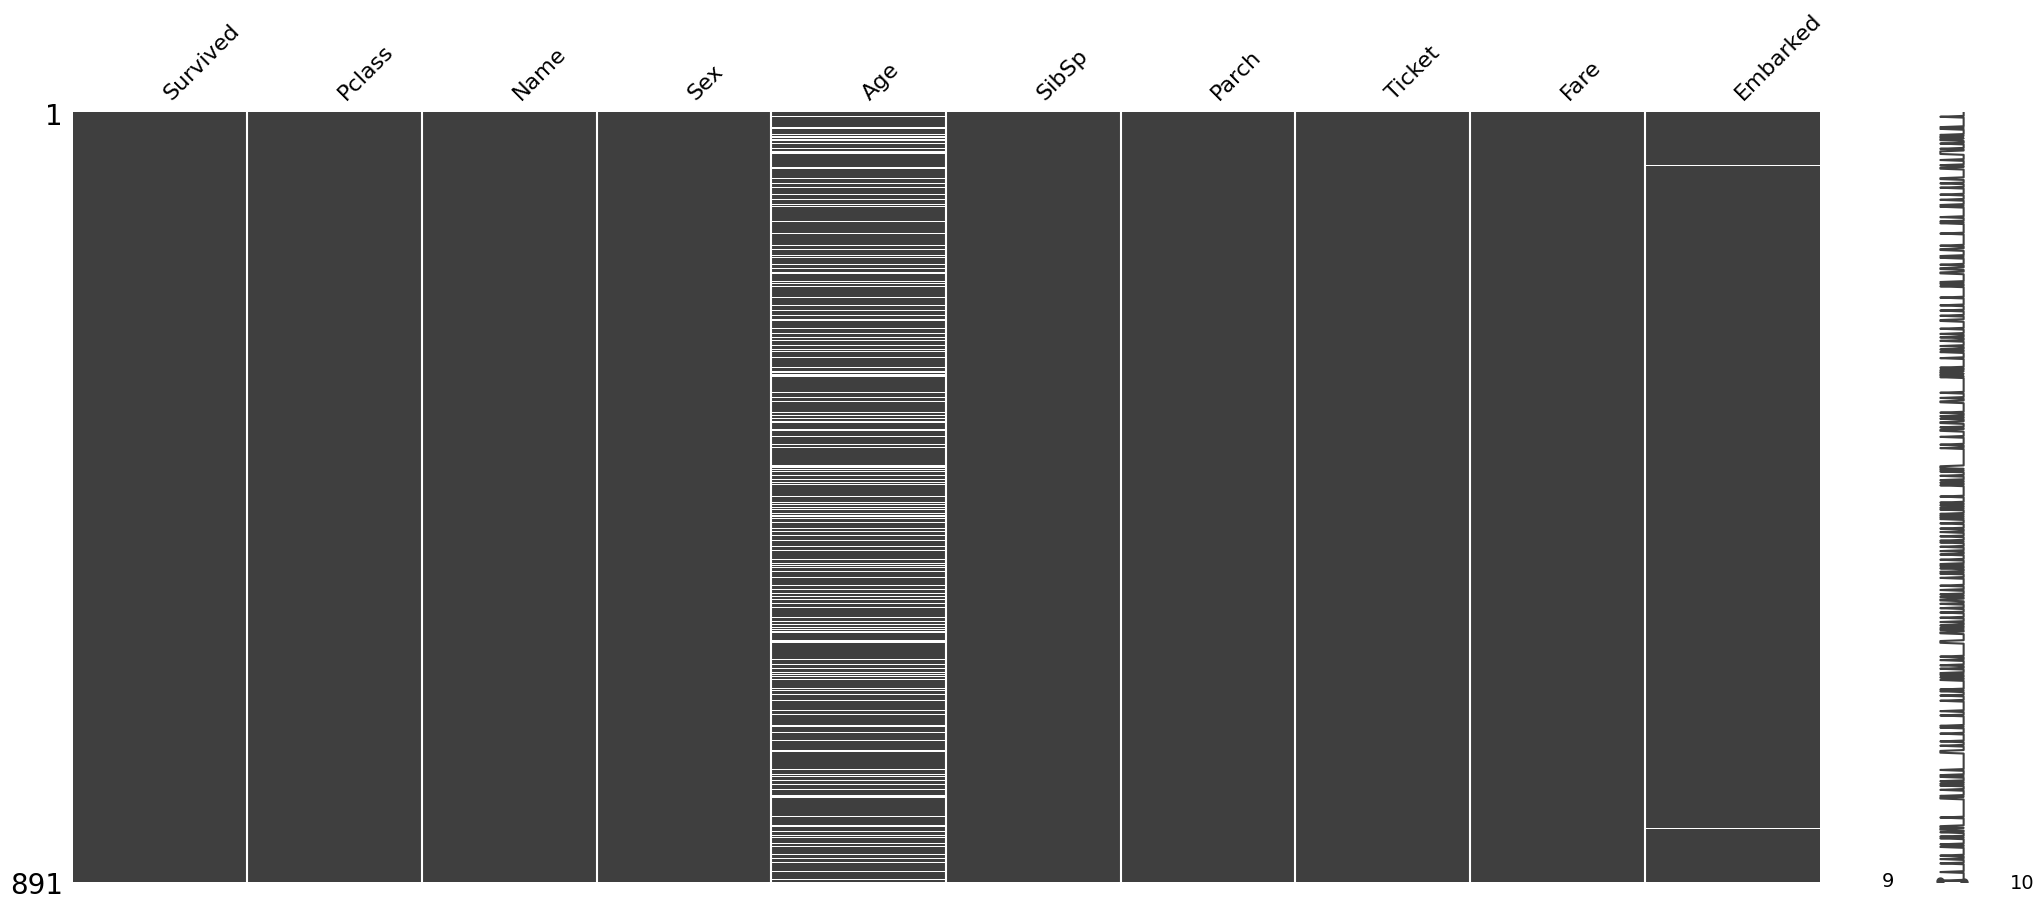

In [1188]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_train)

In [1189]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df):

    # ortalama ile doldur
    df['Age'] = df['Age'].fillna(df['Age'].mean())

    # mod ile doldur
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    return df
df = eksik_verileri_doldur(df_train)

df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [1190]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_train.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


In [1191]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df_train[numerical_features_1].head()

Number of numerical variables:  6


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [1192]:
# kesikli değiken sayısını bul
discrete_features=[feature for feature in numerical_features_1 if len(df_train[feature].unique())<10]

print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 4


In [1193]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df_train[feature].unique())) for feature in numerical_features_1]

Survived 2
Pclass 3
Age 89
SibSp 7
Parch 7
Fare 248


[None, None, None, None, None, None]

In [1194]:
# Sürekli Değişken Sayısını bul
continuous_feature=[feature for feature in numerical_features_1 if feature not in discrete_features]

print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 2


In [1195]:
# sayısal sürekli değişkenleri görelim
df_train[continuous_feature].head(3)

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250


[]

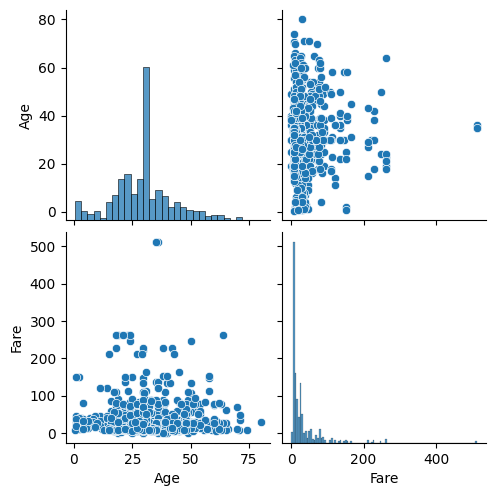

In [1196]:
sns.pairplot(df_train[continuous_feature])
plt.plot()

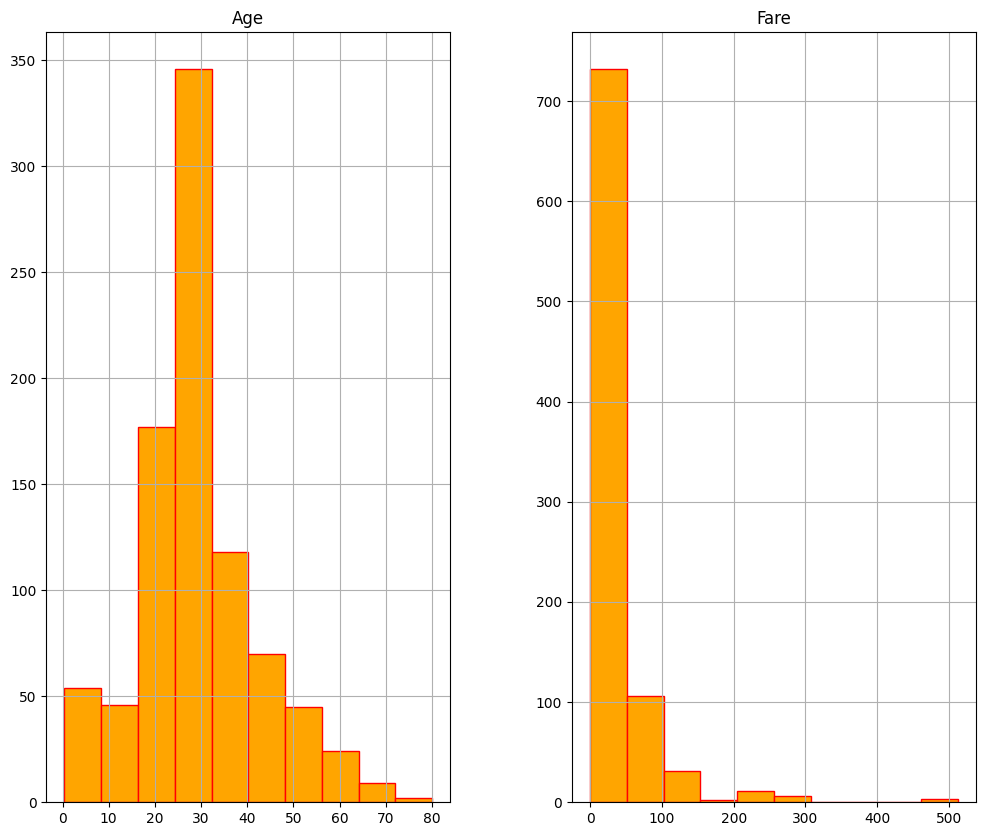

<Figure size 600x400 with 0 Axes>

In [1197]:
df_train[continuous_feature].hist(figsize=(12, 10), color='orange', edgecolor='red')
plt.figure(figsize=(6,4))
plt.tight_layout()
plt.show()

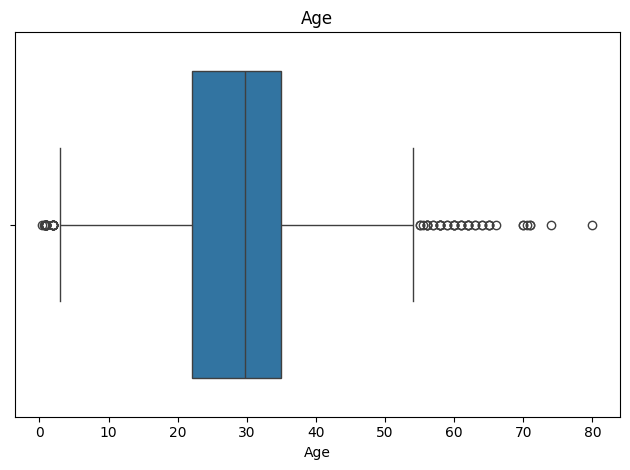

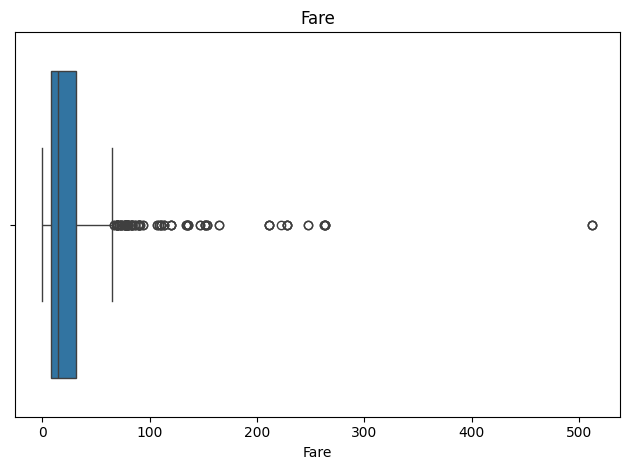

In [1198]:
# continuous_feature kolonlarının Boxplot grafiği çizip aykırı değerleri değerlendirmek
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

In [1199]:
# continuous_feature kolonları min-max ile baskılamak


def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir

    
        
    return df

# Aykırı değerleri düzeltmek istediğiniz sütunları seçin
secilen_sutunlar = continuous_feature

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, secilen_sutunlar)

In [1200]:
# continuous_feature kolonlarının Boxplot grafiği çizip aykırı değerleri değerlendirmek
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

Age sütununda aykırı değer bulunmamaktadır.
Fare sütununda aykırı değer bulunmamaktadır.


In [1201]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_train)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
Survived, Pclass, SibSp, Parch

object Veri Türü Sütunları:
Name, Sex, Ticket, Embarked

float64 Veri Türü Sütunları:
Age, Fare



In [1202]:
df_train.Name.unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [1203]:
# Name kolonu isimleri içeriyor. ayrıca bu isimlerin yanında ünvanları da var. bu ünvanlara göre bölüp yeni bi kolon oluşturacağım

df_train["Ünvan"] = df_train["Name"].str.split(".").str.get(0)
print(df_train["Ünvan"]) 
df_train["Ünvan"] = df_train["Ünvan"].str.split(",").str.get(1)
print(df_train["Ünvan"])
df_train["Ünvan"] = df_train["Ünvan"].str.strip() # baştaki ve sondaki boşlukları temizle

# İngilizce ve fransızca aynı olan ünvanları birleştirelim
f_ünvan = ["Don","Done","Mme","Ms","Mra","Mlle"]
i_ünvan = ["Mr","Mrs","Mrs","Mrs","Mrs","Miss"]

for i in range(len(f_ünvan)):
    for j in range(len(i_ünvan)):
        if i==j:
            df_train["Ünvan"] = df_train["Ünvan"].str.replace(f_ünvan[i],i_ünvan[j])

0           Braund, Mr
1         Cumings, Mrs
2      Heikkinen, Miss
3        Futrelle, Mrs
4            Allen, Mr
            ...       
886      Montvila, Rev
887       Graham, Miss
888     Johnston, Miss
889           Behr, Mr
890         Dooley, Mr
Name: Ünvan, Length: 891, dtype: object
0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Ünvan, Length: 891, dtype: object


In [1204]:
# df DataFrame'inizde "Ünvan" sütunuyla gruplama ve sayma işlemi
grup_df = df_train.groupby("Ünvan").size().reset_index(name='Toplam')

# Toplam sayılara göre sıralama
sıralama_df = grup_df.sort_values(by='Toplam', ascending=False)
print(sıralama_df)

           Ünvan  Toplam
8             Mr     518
7           Miss     184
9            Mrs     127
6         Master      40
2             Dr       7
10           Rev       6
1            Col       2
5          Major       2
0           Capt       1
3       Jonkheer       1
4           Lady       1
11           Sir       1
12  the Countess       1


In [1205]:
# Ünvan kolonunda frekansları fazla olanları alacağım az olanları ise diğerleri diye gruplayacağım.
df_train["Ünvan"] = df_train["Ünvan"].apply(lambda x:x if x in ["Mr","Miss","Mrs","Master"] else "other")
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ünvan
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss


In [1206]:
# df DataFrame'inizde "Ünvan" sütunuyla gruplama ve sayma işlemi
grup_df = df_train.groupby("Ünvan").size().reset_index(name='Toplam')

# Toplam sayılara göre sıralama
sıralama_df = grup_df.sort_values(by='Toplam', ascending=False)
print(sıralama_df)

    Ünvan  Toplam
2      Mr     518
1    Miss     184
3     Mrs     127
0  Master      40
4   other      22


In [1207]:
# Ticket kolonunun içindeki değerlerin hayatta kalıp kalmama ile alakalı bir etkisinin bulunmayacağını düşünerek bu kolonu siliyorum. Ayrına Name kolonuna da ihtiyaç kalmadı
df_train = df_train.drop(columns=["Ticket","Name"])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,65.6344,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [1208]:
# Veri tiplerine bakmak
result = sütunlari_veri_türune_gore_grupla(df_train)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
Survived, Pclass, SibSp, Parch

object Veri Türü Sütunları:
Sex, Embarked, Ünvan

float64 Veri Türü Sütunları:
Age, Fare



In [1209]:
# sex,Embarked,Ünvan ve ayrıca Pclass sutunları kategoriktir. bu sutunlara encoding uygulayacağım.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorik__değişkeler = ["Sex","Embarked","Ünvan" ,"Pclass"]
for i in kategorik__değişkeler:
    df_train[i] = le.fit_transform(df_train[i])
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,0,2,1,22.0,1,0,7.2500,2,2
1,1,0,0,38.0,1,0,65.6344,0,3
2,1,2,0,26.0,0,0,7.9250,2,1
3,1,0,0,35.0,1,0,53.1000,2,3
4,0,2,1,35.0,0,0,8.0500,2,2


In [1210]:
yer_değiştir = df_train.pop('Survived')
df_train['Survived'] = yer_değiştir
df_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan,Survived
0,2,1,22.0,1,0,7.2500,2,2,0
1,0,0,38.0,1,0,65.6344,0,3,1
2,2,0,26.0,0,0,7.9250,2,1,1


## test.csv

In [1211]:
# Veri setini okumak
df_t = pd.read_csv("Test.csv",delimiter=",")
df_t.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1212]:
df_t = df_t.drop(columns="PassengerId")

In [1213]:
# eksik değerleri ve eksik değer yüzdelerine bakmak 

def eksik_data(df,n):
    eksik_değerler = df.isnull().sum().sort_values(ascending=False)

    eksik_değer_yüzdesi = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100

    eksik_data = pd.concat([eksik_değerler,eksik_değer_yüzdesi],axis=1,keys = ["Eksik Değerler","Eksik Değerler Yüzdesi"],sort=False)
    print(eksik_data.head(n))

eksik_data(df_t,5)

        Eksik Değerler  Eksik Değerler Yüzdesi
Cabin              327               78.229665
Age                 86               20.574163
Fare                 1                0.239234
Pclass               0                0.000000
Name                 0                0.000000


In [1214]:
# Cabin kolonu çok fazla eksik veri içerdiği için silmeye karar verdim.
df_t = df_t.drop(columns="Cabin")

<Axes: >

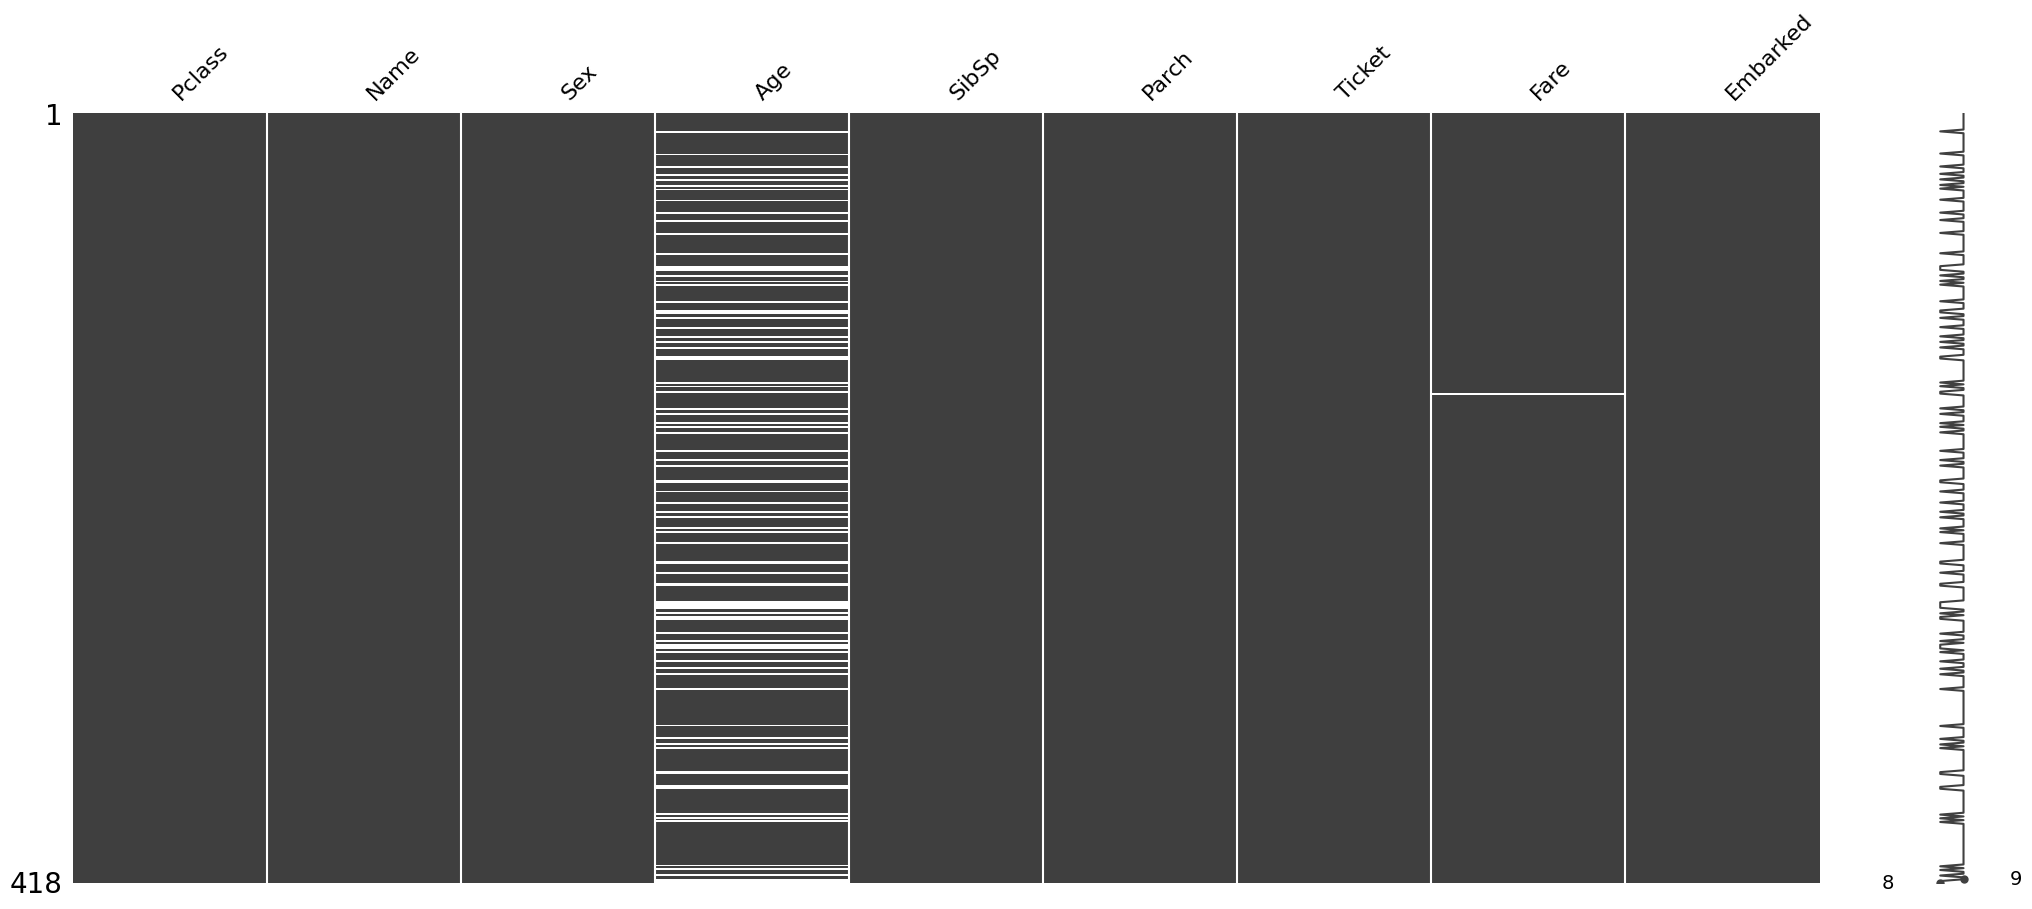

In [1215]:
# Veri kümesindeki eksik verilerin görsel temsili
missingno.matrix(df_t)

In [1216]:
# eksik verilerin tümü için nasıl doldurulacağını seçmek.

def eksik_verileri_doldur(df):

    # ortalama ile doldur
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

    # mod ile doldur
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

    return df
df = eksik_verileri_doldur(df_t)

df.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [1217]:
# Eksik veri kontrolü yapmak
eksik_verilerin_toplamı = df_t.isnull().sum().sum()
print("Eksik verilerin toplamı:",eksik_verilerin_toplamı)

Eksik verilerin toplamı: 0


In [1218]:
# sayısal değişkenlerin listesi
numerical_features_1 = [feature for feature in df_t.columns if df_t[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# sayısal değişkenleri görelim
df_t[numerical_features_1].head()

Number of numerical variables:  5


,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875


In [1219]:
# kesikli değiken sayısını bul
discrete_features=[feature for feature in numerical_features_1 if len(df_t[feature].unique())<10]

print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

Kesikli Değişken Sayısı: 3


In [1220]:
# Sayısal alanlarımızın icindeki tekil değer sayılarını görüyoruz, bu şekilde de discrete mi continuous mu anlayabiliriz
[print(feature, len(df_t[feature].unique())) for feature in numerical_features_1 ]

Pclass 3
Age 80
SibSp 7
Parch 8
Fare 170


[None, None, None, None, None]

In [1221]:
# Sürekli Değişken Sayısını bul
continuous_feature=[feature for feature in numerical_features_1 if feature not in discrete_features]

print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 2


In [1222]:
# sayısal sürekli değişkenleri görelim
df_t[continuous_feature].head(3)

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875


In [1223]:
# continuous_feature kolonları min-max ile baskılamak
def aykiri_degerleri_min_max_sinirlar_ile_doldur(df, sutunlar):
    for col in sutunlar:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        alt_sinir = Q1 - 1.5 * IQR
        ust_sinir = Q3 + 1.5 * IQR

        df.loc[df[col] < alt_sinir, col] = alt_sinir
        df.loc[df[col] > ust_sinir, col] = ust_sinir    
    return df

# Aykırı değerleri düzeltmek istediğiniz sütunları seçin
secilen_sutunlar = continuous_feature

# Aykırı değerleri düzelt
df = aykiri_degerleri_min_max_sinirlar_ile_doldur(df, secilen_sutunlar)

In [1224]:
# continuous_feature kolonlarının Boxplot grafiği çizip aykırı değerleri değerlendirmek
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Sadece aykırı değerlere sahip sütunları çiz
    if any((df[col] < lower_limit) | (df[col] > upper_limit)):
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.tight_layout()
        plt.show()
    else:
        print(f"{col} sütununda aykırı değer bulunmamaktadır.")

Age sütununda aykırı değer bulunmamaktadır.
Fare sütununda aykırı değer bulunmamaktadır.


In [1225]:
def sütunlari_veri_türune_gore_grupla(df):
    result_dict = {}

    for col, dtype in df.dtypes.items():
        dtype_str = str(dtype)
        
        if dtype_str not in result_dict:
            result_dict[dtype_str] = []
        
        result_dict[dtype_str].append(col)

    result_str = ""
    for dtype, columns in result_dict.items():
        result_str += f"\n{dtype} Veri Türü Sütunları:\n"
        result_str += ', '.join(columns) + '\n'
        result_str += '=' * 50 + '\n'

    return result_str

# df DataFrame'iniz olduğunu varsayalım
result = sütunlari_veri_türune_gore_grupla(df_t)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
Pclass, SibSp, Parch

object Veri Türü Sütunları:
Name, Sex, Ticket, Embarked

float64 Veri Türü Sütunları:
Age, Fare



In [1226]:
df.Name.unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

In [1227]:
# Name kolonu isimleri içeriyor. ayrıca bu isimlerin yanında ünvanları da var. bu ünvanlara göre bölüp yeni bi kolon oluşturacağım

df_t["Ünvan"] = df_t["Name"].str.split(".").str.get(0)
print(df_t["Ünvan"]) 
df_t["Ünvan"] = df_t["Ünvan"].str.split(",").str.get(1)
print(df_t["Ünvan"])
df_t["Ünvan"] = df_t["Ünvan"].str.strip() # baştaki ve sondaki boşlukları temizle

# İngilizce ve fransızca aynı olan ünvanları birleştirelim
f_ünvan = ["Don","Done","Mme","Ms","Mra","Mlle"]
i_ünvan = ["Mr","Mrs","Mrs","Mrs","Mrs","Miss"]

for i in range(len(f_ünvan)):
    for j in range(len(i_ünvan)):
        if i==j:
            df_t["Ünvan"] = df_t["Ünvan"].str.replace(f_ünvan[i],i_ünvan[j])

0                Kelly, Mr
1              Wilkes, Mrs
2                Myles, Mr
3                 Wirz, Mr
4            Hirvonen, Mrs
              ...         
413            Spector, Mr
414    Oliva y Ocana, Dona
415            Saether, Mr
416               Ware, Mr
417          Peter, Master
Name: Ünvan, Length: 418, dtype: object
0           Mr
1          Mrs
2           Mr
3           Mr
4          Mrs
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: Ünvan, Length: 418, dtype: object


In [1228]:
# df DataFrame'inizde "Ünvan" sütunuyla gruplama ve sayma işlemi
grup_df = df_t.groupby("Ünvan").size().reset_index(name='Toplam')

# Toplam sayılara göre sıralama
sıralama_df = grup_df.sort_values(by='Toplam', ascending=False)
print(sıralama_df)

    Ünvan  Toplam
4      Mr     240
3    Miss      78
5     Mrs      74
2  Master      21
0     Col       2
6     Rev       2
1      Dr       1


In [1229]:
# Ünvan kolonunda frekansları fazla olanları alacağım az olanları ise diğerleri diye gruplayacağım.
df_t["Ünvan"] = df_t["Ünvan"].apply(lambda x:x if x in ["Mr","Miss","Mrs","Master"] else "other")
df_t.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Ünvan
0,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.8292,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.0000,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,54.875,0,0,240276,9.6875,Q,Mr


In [1230]:
# df DataFrame'inizde "Ünvan" sütunuyla gruplama ve sayma işlemi
grup_df = df_t.groupby("Ünvan").size().reset_index(name='Toplam')

# Toplam sayılara göre sıralama
sıralama_df = grup_df.sort_values(by='Toplam', ascending=False)
print(sıralama_df)

    Ünvan  Toplam
2      Mr     240
1    Miss      78
3     Mrs      74
0  Master      21
4   other       5


In [1231]:
# Ticket kolonunun içindeki değerlerin hayatta kalıp kalmama ile alakalı bir etkisinin bulunmayacağını düşünerek bu kolonu siliyorum. Ayrına Name kolonuna da ihtiyaç kalmadı
df_t = df_t.drop(columns=["Ticket","Name"])
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,3,male,34.500,0,0,7.8292,Q,Mr
1,3,female,47.000,1,0,7.0000,S,Mrs
2,2,male,54.875,0,0,9.6875,Q,Mr
3,3,male,27.000,0,0,8.6625,S,Mr
4,3,female,22.000,1,1,12.2875,S,Mrs


In [1232]:
# Veri tiplerine bakmak
result = sütunlari_veri_türune_gore_grupla(df_t)

# Sonuçları görüntüleme
print(result)


int64 Veri Türü Sütunları:
Pclass, SibSp, Parch

object Veri Türü Sütunları:
Sex, Embarked, Ünvan

float64 Veri Türü Sütunları:
Age, Fare



In [1233]:
# sex,Embarked,Ünvan ve ayrıca Pclass sutunları kategoriktir. bu sutunlara encoding uygulayacağım.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

kategorik__değişkeler = ["Sex","Embarked","Ünvan" ,"Pclass"]
for i in kategorik__değişkeler:
    df_t[i] = le.fit_transform(df_t[i])
df_t.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,2,1,34.500,0,0,7.8292,1,2
1,2,0,47.000,1,0,7.0000,2,3
2,1,1,54.875,0,0,9.6875,1,2
3,2,1,27.000,0,0,8.6625,2,2
4,2,0,22.000,1,1,12.2875,2,3


In [1234]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan,Survived
0,2,1,22.0,1,0,7.2500,2,2,0
1,0,0,38.0,1,0,65.6344,0,3,1
2,2,0,26.0,0,0,7.9250,2,1,1
3,0,0,35.0,1,0,53.1000,2,3,1
4,2,1,35.0,0,0,8.0500,2,2,0


In [1235]:
x = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [1236]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0,stratify=y)

In [1237]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [1238]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# accuracy:
models = [
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ("AdaBoost", AdaBoostClassifier()),
          ('GBM', GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier(objective='binary:logistic')),
          ("LightGBM", LGBMClassifier(verbosity=-1)),
          ("CatBoost", CatBoostClassifier(verbose=False))]

accuracy_list = []

for name, clf in models:
    cvs = cross_val_score(clf, 
                          x_test, y_test,
                          cv=5,
                          scoring="accuracy", n_jobs=-1)
    
    print("Accuracy-->", cvs.mean(), name)
    
    accuracy_list.append(cvs.mean())
    accuracy_list.append(name)

Accuracy--> 0.7823809523809524 KNN
Accuracy--> 0.6930158730158731 CART


Accuracy--> 0.7652380952380953 RF
Accuracy--> 0.7598412698412698 AdaBoost
Accuracy--> 0.7768253968253969 GBM
Accuracy--> 0.7544444444444445 XGBoost
Accuracy--> 0.7711111111111111 LightGBM
Accuracy--> 0.7936507936507936 CatBoost


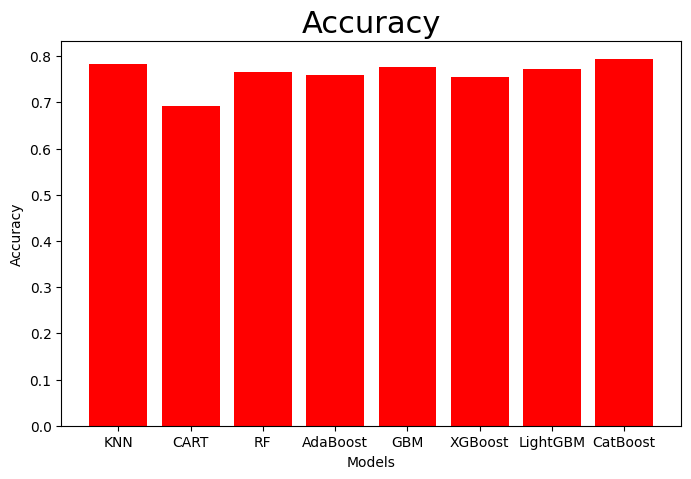

In [1239]:
models = accuracy_list[1::2]
r2 = accuracy_list[::2]

plt.figure(figsize=(8, 5))
plt.bar(models, r2, color="red")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy', fontsize=22)
plt.show()

In [1015]:
import optuna
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from warnings import filterwarnings

filterwarnings('ignore')
import optuna.logging

optuna.logging.set_verbosity(optuna.logging.WARNING)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = {}
best_accuracy_score = 0

def objective(trial, x_train, y_train):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 1, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0)
    }

    model = CatBoostClassifier(**params, verbose=0)
    y_pred = cross_val_predict(model, x_train, y_train, cv=cv)
    accuracy = accuracy_score(y_train, y_pred)
    global best_accuracy_score, best_params
    if accuracy > best_accuracy_score:
        best_accuracy_score = accuracy
        best_params = params
    return 1 - accuracy

study = optuna.create_study(direction='minimize')
study.optimize(lambda trial: objective(trial, x_train, y_train), n_trials=20)

print("Best Accuracy Score:", best_accuracy_score)
print("Best Parameters:", best_params)

Best Accuracy Score: 0.8384831460674157
Best Parameters: {'n_estimators': 303, 'learning_rate': 0.6973326764936543, 'depth': 1, 'l2_leaf_reg': 0.6211848888365427}


In [1240]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(n_estimators=303, learning_rate=0.6973326764936543, depth=1, l2_leaf_reg=0.6211848888365427,verbose=0)
classifier.fit(x_train, y_train)

In [1241]:
y_pred = classifier.predict(x_test)

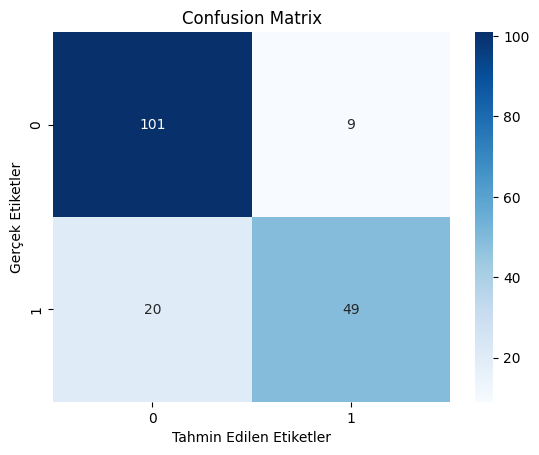

In [1242]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [1243]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1_Score = f1_score(y_test,y_pred)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

precision: 0.8448275862068966
recall: 0.7101449275362319
accuracy: 0.8379888268156425
f1_Score: 0.7716535433070866


In [1244]:
y_pred_train = classifier.predict(x_train)

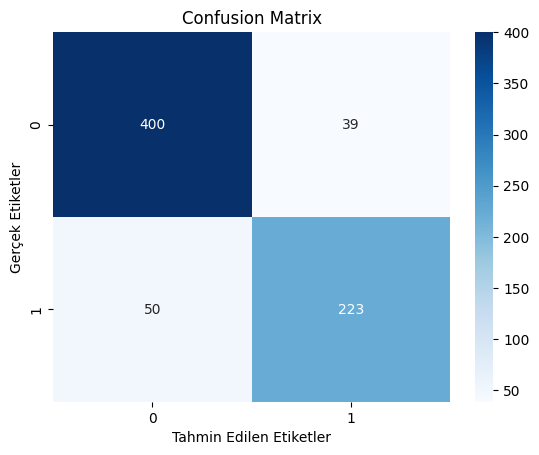

In [1245]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen Etiketler")
plt.ylabel("Gerçek Etiketler")
plt.show()

In [1246]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print("Train verisi")
precision = precision_score(y_train,y_pred_train)
recall = recall_score(y_train,y_pred_train)
accuracy = accuracy_score(y_train,y_pred_train)
f1_Score = f1_score(y_train,y_pred_train)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

print("\n")

print("Test verisi")
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
f1_Score = f1_score(y_test,y_pred)

print("precision:",precision)
print("recall:",recall)
print("accuracy:",accuracy)
print("f1_Score:",f1_Score)

Train verisi
precision: 0.851145038167939
recall: 0.8168498168498168
accuracy: 0.875
f1_Score: 0.8336448598130841


Test verisi
precision: 0.8448275862068966
recall: 0.7101449275362319
accuracy: 0.8379888268156425
f1_Score: 0.7716535433070866


In [1247]:
classifier.fit(x_train, y_train)

# unsen data seti işlemleri

In [1248]:
df_t.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Ünvan
0,2,1,34.500,0,0,7.8292,1,2
1,2,0,47.000,1,0,7.0000,2,3
2,1,1,54.875,0,0,9.6875,1,2
3,2,1,27.000,0,0,8.6625,2,2
4,2,0,22.000,1,1,12.2875,2,3


In [1249]:
unsen = df_t.iloc[:, :].values

In [1250]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
unsen=scaler.fit_transform(unsen)

In [1251]:
y_predd = classifier.predict(unsen)

In [1252]:
submission = pd.read_csv("gender_submission.csv",delimiter=",")
submission

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [1253]:
submission["Survived"] = y_predd
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [1254]:
submission.to_csv('gender_submission.csv', index=False)